## Importing Modules

In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --------------------------------------- 301.4/301.4 kB 18.2 MB/s eta 0:00:00


In [50]:
!pip install ipympl


   ---------------------------------------- 0.0/516.3 kB ? eta -:--:--
   --------------------------------------- 516.3/516.3 kB 16.3 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import re
from PIL import Image

#nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

## Loading the Dataset

In [2]:
dataset = pd.read_csv('Sentiment140.csv', encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])
dataset.replace({'target':{4:1}}, inplace=True)
label_map = {0: "NEGATIVE", 1: "POSITIVE"}
def label_sentiment(label):
    return label_map[int(label)]

In [3]:
dataset['target'] = dataset['target'].apply( lambda x: label_sentiment(x))

## Distribution of Positive and Negative Tweets

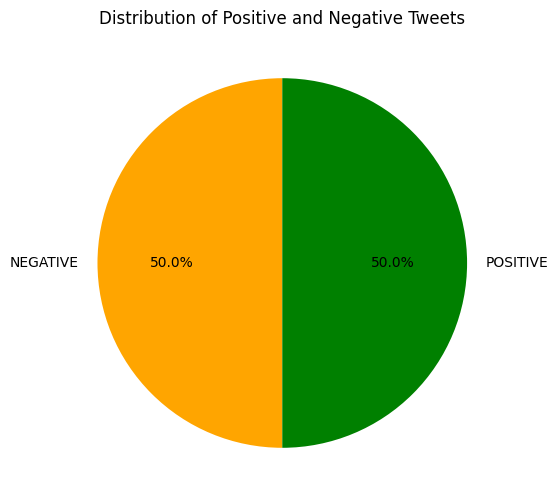

In [4]:
sentiment_counts = dataset['target'].value_counts()

#Pie Chart
plt.figure(figsize=(8, 6))
colors = ['orange', 'green']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

### Replacing URLs , Mentions and Hashtags

In [5]:
def clean_text(text):
  text = re.sub(r"(http\S+)", "URL", text)  # Replace URLs with "URL"
  text = re.sub(r"@\S+", "@user", text)    # Replace mentions with "@user"
  text = re.sub(r"#\S+", "#hashtag", text)  # Replace hashtags with "#hashtag"
  return text

In [6]:
dataset['clean_text'] = dataset['text'].apply(clean_text)

In [7]:
selected_columns=['text','clean_text']
dataset[selected_columns]

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@user URL - Awww, that's a bummer. You should..."
1,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,@user I dived many times for the ball. Managed...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....","@user no, it's not behaving at all. i'm mad. w..."
...,...,...
1599995,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...
1599996,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...
1599997,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...


# Distribution of @UserMentions , Links , #Hashtages

In [8]:
# Count occurrences
usermentions_count = dataset['clean_text'].str.count("@user").sum()
hashtags_count = dataset['clean_text'].str.count("#hashtag").sum()
links_count = dataset['clean_text'].str.count("URL").sum()

In [9]:
total_tweets = len(dataset['clean_text'])

In [10]:
# Calculate percentages
usermentions_pct = (usermentions_count / total_tweets) * 100
hashtags_pct = (hashtags_count / total_tweets) * 100
links_pct = (links_count / total_tweets) * 100

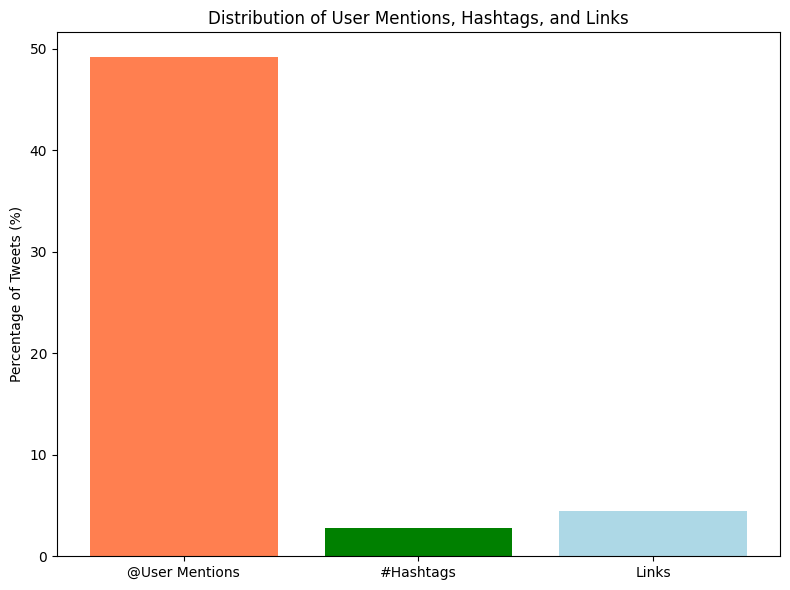

In [12]:
# Create a bar chart
labels = ['@User Mentions', '#Hashtags', 'Links']
sizes = [usermentions_pct, hashtags_pct, links_pct]
colors = ['coral', 'green', 'lightblue']

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of User Mentions, Hashtags, and Links')
plt.ylabel('Percentage of Tweets (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Word Cloud

### Data PreProcessing

In [15]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
def preprocess(text, stem=False):
  # Removing the Links , user mentions and special characters
  text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(text))
  text = text.lower()
  text = text.strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_14432\1889093041.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(text))
[nltk_data] Downloading package stopwords to C:\Users\Brian
[nltk_data]     Biju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
dataset['clean_text'] = dataset['text'].apply(lambda x: preprocess(x))

### Seperating Positive and Negative Tweets

In [43]:
positive_tweets = dataset[dataset['target'] == 'POSITIVE']['clean_text']
negative_tweets = dataset[dataset['target'] == 'NEGATIVE']['clean_text']

In [47]:
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

In [67]:
stop_words = set(stopwords.words('english'))
stop_words.update(['amp', 'quot', 'today','still','know','think','one','got',
                  'right','want','work','thing','go','time','need','though'])

In [68]:
# Generate word clouds
wordcloud_positive = WordCloud(stopwords=stop_words,width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(stopwords=stop_words,width=800, height=400, background_color='white').generate(negative_text) 

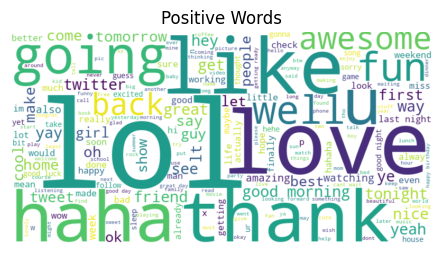

In [69]:
# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')
plt.show()

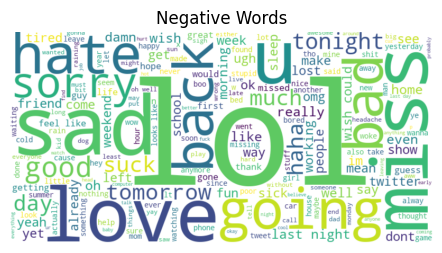

In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')
plt.show()